<img src='./img/logo_fire_workshop.png' alt='Logo EU Copernicus EUMETSAT' align='right' width='40%'></img>

<br>

<a href="./11_ac-saf_gome2_AAI.ipynb"><< 11 - AC SAF GOME-2 AAI </a><span style="float:right;"><a href="./12_s5p_tropomi_UVAI.ipynb"> 13 - IASI CO >></a></span>

# Copernicus Sentinel-5P TROPOMI UV Aerosol Index (UVAI)

Sentinel-5p carries the `TROPOMI` instrument, which is a spectrometer in the UV-VIS-NIR-SWIR spectral range. `TROPOMI` provides measurements on: `Ozone`, `NO`<sub>`2`</sub>, `SO`<sub>`2`</sub>, `Formaldehyde`, `Aerosol`, `Carbonmonoxide`, `Methane` and `Clouds`.

For fire monitoring , the `TROPOMI UV Aerosol Index (UVAI)` data can be used. 

Positive values of UVAI (typically > abt. 1.0) indicate the presence of absorbing-type aerosols: 
- `smoke from forest fires`, 
- `volcanic ash`, or 
- `desert dust`. 

The UVAI value depends on (i) the amount of aerosols, (ii) height of the aerosol plume, and (iii) aerosol type. 

Typically UVAI is more sensitive to the elevated aerosol layers and hence it can be used to track the (long-range) transport of smoke from fires. To asses the ambient air quality near the surface, other aerosol observations, such as AOD from satellites, in situ aerosol observations or modeled surface concentrations are recommended to be used together with UVAI. 

#### Load required libraries

In [2]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.colors
from netCDF4 import Dataset
import pandas as pd

import cartopy
import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

from matplotlib.axes import Axes
from cartopy.mpl.geoaxes import GeoAxes
GeoAxes._pcolormesh_patched = Axes.pcolormesh

import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter(action = "ignore", category = RuntimeWarning)

#### Helper functions

In [3]:
from ipynb.fs.full.functions import generate_xr_from_1D_vec, generate_masked_array, visualize_pcolormesh


In [4]:
?generate_xr_from_1D_vec

<hr>

## Load, browse and visualize the UV Aerosol Index data

### Load the `netCDF` files with the `xarray` function `open_mfdataset`

The Sentinel-5P TROPOMI UVAI data are disseminated in the `netCDF` data. You can use the `xarray` function `open_mfdataset` to open multiple netCDF files at once. For the keyword argument `concat_dim`, you want to set `scanline` and for `group`, you want to set `PRODUCT`.

In [5]:
s5p_mf = xr.open_mfdataset('./eodata/sentinel5p/UVAI/2019/07/25/*.nc', concat_dim='scanline', combine='nested', group='PRODUCT')
s5p_mf


<xarray.Dataset>
Dimensions:                          (corner: 4, ground_pixel: 450, scanline: 6446, time: 1)
Coordinates:
  * corner                           (corner) float64 0.0 1.0 2.0 3.0
  * time                             (time) datetime64[ns] 2019-07-25
  * ground_pixel                     (ground_pixel) float64 0.0 1.0 ... 449.0
  * scanline                         (scanline) float64 0.0 1.0 ... 3.2e+03
    latitude                         (time, scanline, ground_pixel) float32 dask.array<chunksize=(1, 3245, 450), meta=np.ndarray>
    longitude                        (time, scanline, ground_pixel) float32 dask.array<chunksize=(1, 3245, 450), meta=np.ndarray>
Data variables:
    delta_time                       (time, scanline) datetime64[ns] dask.array<chunksize=(1, 3245), meta=np.ndarray>
    time_utc                         (time, scanline) object dask.array<chunksize=(1, 3245), meta=np.ndarray>
    qa_value                         (time, scanline, ground_pixel) float32 dask.array<chunksize=(1, 3245, 450), meta=np.ndarray>
    aerosol_index_354_388            (time, scanline, ground_pixel) float32 dask.array<chunksize=(1, 3245, 450), meta=np.ndarray>
    aerosol_index_340_380            (time, scanline, ground_pixel) float32 dask.array<chunksize=(1, 3245, 450), meta=np.ndarray>
    aerosol_index_354_388_precision  (time, scanline, ground_pixel) float32 dask.array<chunksize=(1, 3245, 450), meta=np.ndarray>
    aerosol_index_340_380_precision  (time, scanline, ground_pixel) float32 dask.array<chunksize=(1, 3245, 450), meta=np.ndarray>

### Select an `aerosol index` variable

The Sentinel-5p TROPOMI aerosol index data provide the Aerosol Index for two different wavelenght pairs: 
- `340_380 nm`
- `354_388 nm` 

For both parameters the interpretation of the index value is the same. 

Let us use the aerosol index for the wavelength pair 340_380 nm. The variable name is `aerosol_index_340_380`. You can select the variable from the data set, together with the geo-coordinates as follows:

In [6]:
uvai = s5p_mf.aerosol_index_340_380[0,:,:]
lat = uvai.latitude
lon = uvai.longitude


### Read the `Quality Flag` to mask the UVAI data

Another important parameter to read is the general quality flag called `qa_value`. The quality flag removes the sun glint pixels, where "falsely" high positive UVAI values over sea can be detected. In order to exclude sun glint, it is recommended to use only values where the `qa_value` is higher than 0.8. 

In [7]:
qa=s5p_mf.qa_value[0,:,:]

### Apply the qa value and mask the data

The final step before plotting is to mask the aerosol index data based on the qa mask. You filter data with the `xarray` function `where`.

In [8]:
uvai_masked=uvai.where(qa > 0.8)

### Visualize the `UV Aerosol Index` value

Before you plot the data, you can define some useful plotting information, e.g. `unit`, `longname` or the geographical extent you wish to plot.

In [9]:
unit = uvai.units
long_name = uvai.long_name
vmin = 1
vmax = 4

latmin=-10
latmax=90
lonmin=40
lonmax=180

You can use the function [visualize_pcolormesh](./function.ipynb#visualize_pcolormesh) to plot the `Aerosol Index for the wavelength pair 340 to 380 nm`

(<Figure size 1440x720 with 2 Axes>,
 <cartopy.mpl.geoaxes.GeoAxesSubplot at 0x7f9f0eb41eb8>)

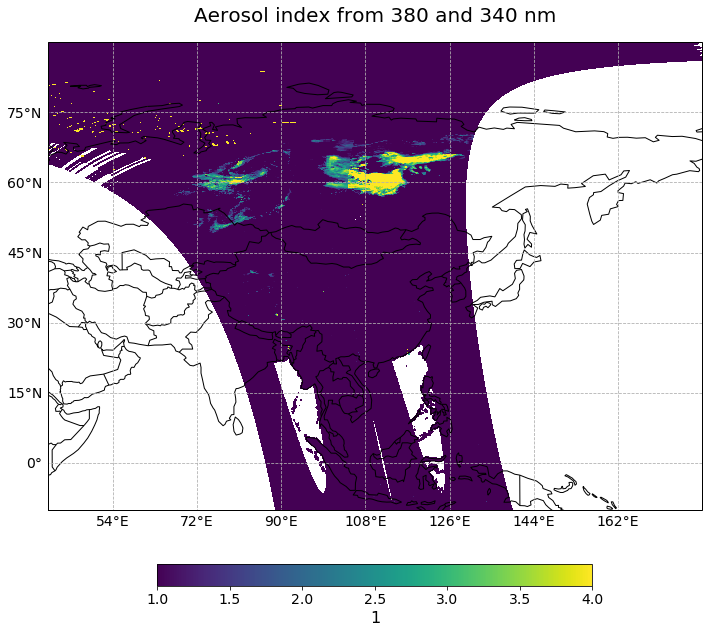

In [10]:
visualize_pcolormesh(uvai_masked, 
                     lon, 
                     lat, 
                     ccrs.PlateCarree(), 
                     'viridis', 
                     unit, 
                     long_name, 
                     vmin, 
                     vmax, 
                     lonmin, 
                     lonmax, 
                     latmin, 
                     latmax, 
                     log=False, 
                     set_global=False)

<br>

<a href="./11_ac-saf_gome2_AAI.ipynb"><< 11 - AC SAF GOME-2 AAI </a><span style="float:right;"><a href="./13_iasi_co.ipynb"> 13 - IASI CO >></a></span>

<hr>

<img src='./img/copernicus_logo.png' alt='Logo EU Copernicus' align='right' width='20%'><br><br><br>

<p style="text-align:right;">This project is licensed under the <a href="./LICENSE">MIT License</a> and is developed under a Copernicus contract.